In [35]:
import os
import seaborn as sns
import numpy as np 
import matplotlib.pyplot as plt
from pathlib import Path
import regex as re
import pandas as pd

In [36]:
results_folder = Path("results/")
tasks_versions = ['skill4_immersive_empty', 'skill4_immersive_empty_hard']

results = [] 

for task in tasks_versions: 
    for filename in os.listdir(results_folder / task): 
        with open(results_folder / task / filename, 'r') as f: 
            lines = f.readlines()
            summary = lines[-1]
            if summary.startswith("="):
                match_str = "([0-9]+) failed, ([0-9]+) passed"
                failed, passed = re.findall(match_str, summary)[0]
                model_name = filename.rstrip(".txt").lstrip("results-")
                results.append({
                    'model': model_name, 
                    'num_correct': int(passed), 
                    'num_failed': int(failed), 
                    'percentage correct': int(passed)/(int(passed)+ int(failed)), 
                    'task': task
                })    

Text(0.5, 1.0, '1 shot correctness on different versions of 5 tasks across models')

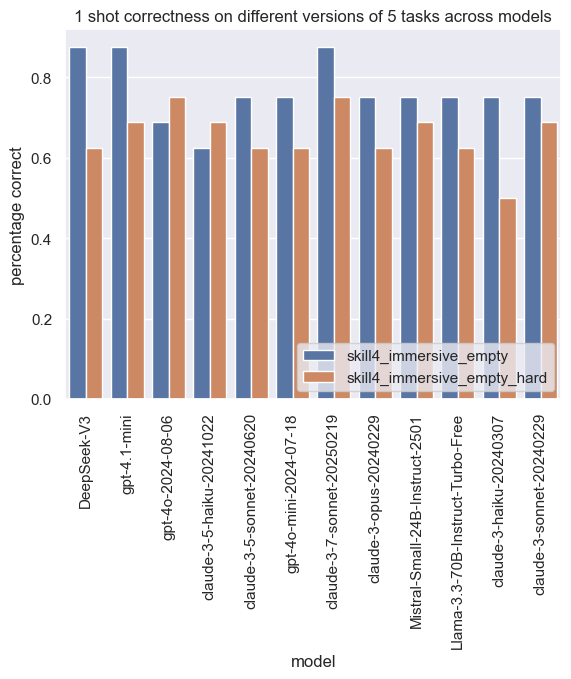

In [40]:
sns.set_theme()
results_df = pd.DataFrame(results)
sns.barplot(data=results_df, x='model', y='percentage correct', hue='task')
plt.legend(loc='lower right')
plt.xticks(rotation=90)
plt.title("1 shot correctness on different versions of 5 tasks across models")